### Add scraped data into dataframe

In [48]:
import pandas as pd
import sqlalchemy
import config

from sqlalchemy.exc import ResourceClosedError

In [54]:
from db import db, query, query_list
df = query('SELECT * FROM  beers')
df = df.drop(columns='grouping')

ProgrammingError: (mysql.connector.errors.ProgrammingError) 1146 (42S02): Table 'beermenus.beers' doesn't exist
[SQL: SELECT * FROM beers]
(Background on this error at: http://sqlalche.me/e/f405)

In [53]:
df.sample(50)

,name,beer_url,beer_type,abv,size,kind,price,bar_url,address,grouping,origin
49,Allagash White,https://www.beermenus.com/beers/859-allagash-w...,Witbier,5.2%,12oz,Bottle,9,https://www.beermenus.com/places/33669-the-mal...,"9 Maiden Lane, New York, NY 10038",BOTTLES,"Portland, ME"
30,Founders All Day IPA,https://www.beermenus.com/beers/10313-founders...,IPA,4.7%,16oz,Draft,9,https://www.beermenus.com/places/33669-the-mal...,"9 Maiden Lane, New York, NY 10038",ON TAP,"Grand Rapids, MI"
43,The Malt House Light,https://www.beermenus.com/beers/24965-the-malt...,Pale Lager,4.8%,16oz,Draft,9,https://www.beermenus.com/places/33669-the-mal...,"9 Maiden Lane, New York, NY 10038",ON TAP,None
35,Kona Longboard Lager,https://www.beermenus.com/beers/57305-kona-lon...,Premium Lager,4.6%,16oz,Draft,9,https://www.beermenus.com/places/33669-the-mal...,"9 Maiden Lane, New York, NY 10038",ON TAP,"Kailua Kona, HI"
24,DuClaw Strawberry Letter 23,https://www.beermenus.com/beers/276808-duclaw-...,Sour IPA,7.1%,16oz,Draft,10,https://www.beermenus.com/places/33669-the-mal...,"9 Maiden Lane, New York, NY 10038",ON TAP,"Hanover, MD"
11,Victory Golden Monkey,https://www.beermenus.com/beers/64-victory-gol...,Tripel,9.5%,9oz,Draft,8,https://www.beermenus.com/places/2251-stone-st...,"52 Stone Street, New York, NY 10004",ON TAP,"Downingtown, PA"
18,Barrier Submersion Double IPA,https://www.beermenus.com/beers/27304-barrier-...,,8.5%,12oz,Draft,12,https://www.beermenus.com/places/33669-the-mal...,"9 Maiden Lane, New York, NY 10038",ON TAP,"Oceanside, NY"
17,Applewood Naked Flock Pumpkin Cider,https://www.beermenus.com/beers/39154-applewoo...,Cider,6.8%,16oz,Draft,10,https://www.beermenus.com/places/33669-the-mal...,"9 Maiden Lane, New York, NY 10038",ON TAP,"Warwick, NY"
41,Surly Bender Infused w/ Coffee,https://www.beermenus.com/beers/76762-surly-be...,Brown Ale,5.1%,16oz,Draft,10,https://www.beermenus.com/places/33669-the-mal...,"9 Maiden Lane, New York, NY 10038",ON TAP,"Minneapolis, MN"
25,Edmund's Oast Singular,https://www.beermenus.com/beers/276875-edmund-...,Session IPA,4.8%,16oz,Draft,10,https://www.beermenus.com/places/33669-the-mal...,"9 Maiden Lane, New York, NY 10038",ON TAP,"Charleston, SC"


### Attempt to clean df

In [47]:
# map columns to num type and remove leading/trailing characters

df['size'] = df['size'].map(lambda x: x.rstrip('oz')).astype(int)
df['price'] = df['price'].map(lambda x: x.lstrip('$')).astype(int)
df['abv'] = df['abv'].astype(float)
df['zip'] = df['address'].map(lambda x: x[-5:]).astype(int)

# added a price/oz column for comparison purposes
df['price_per_oz'] = round(df['price']/df['size'],3)

AttributeError: 'NoneType' object has no attribute 'rstrip'

### Initial EDA

#### Started pmf visualization

In [123]:
import collections

# count the frequency of each price
counter = collections.Counter(df['price'])

In [124]:
# Convert frequency to probability - divide each frequency value by total number of values
pmf = []
for key,val in counter.items():
    pmf.append(val/df2.shape[0])

# price per oz of beers with frequency of these prices
print(counter.keys(), pmf)

dict_keys([8, 9]) [0.3125, 0.6875]


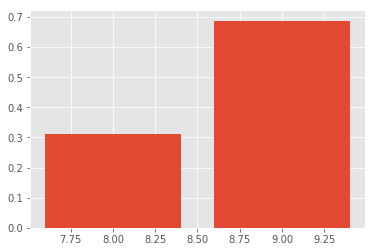

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(counter.keys(),pmf);

### Chi-square independence

#### Are certain beer styles more popular in each borough?

##### H0: Borough has no effect on the popularity of a beer style.

##### Ha: (Style) IPAs are more popular in (borough) Brooklyn.

In [62]:
boroughs = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
styles = {
    'Pilsner':['Pils', 'Light', 'American Lager', 'Pale Lager'],
    'Wheat':['Hefewiezen', 'Hefeweizen', 'Wiess', 'Wit', 'Witbier'],
    'Lager':['Vienna'],
    'Stout':['Porter', 'Scotch', 'Smoked'],
    'Ale':['Pale Ale', 'Amber', 'Brown', 'Red', 'Saison', 'Bock', 'Dopplebock', 'Kolsch', 'Octoberfest', 'Cream' ],
    'IPA':['Session', 'Double IPA', 'IIPA', '2xIPA', '2XIPA', 'NEIPA'],
    'Sour':['Gose', 'Berliner Weisse'],
    'Imperial Stout':['Barley Wine'], 
    'Belgian Strong':['Tripel', 'Dubbel', 'Abbey'], 
    'Fruit':['Lambic', 'Pumpkin', 'Cider']
    }

In [69]:
for beer in counter.keys():
    if counter[beer] in styles.values():
        counter[beer] = styles[beer]
counter

Counter({'Pilsner': 1,
         'IPA': 3,
         'Cider': 2,
         'Lager': 1,
         'NE/Hazy IPA': 2,
         'Spiced Beer': 1,
         'Dry Stout': 1,
         'Witbier': 1,
         'Tripel': 1,
         'Porter': 1,
         'Pale Lager': 1,
         'Gose': 1})

In [16]:
# number of rows
r = len(styles.keys())
# columns
c = len(boroughs)
r,c
# calc degrees of freedom
df = (r-1)*(c-1)
df

36